# MIT License

All code in this note is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license. https://creativecommons.org/licenses/by/3.0/us/

These licenses let others distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright(c) 2023 Kumar Mehul

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Abstract

We have 2 datasets, Mobile Price Classification and Dataset.

The Iris Data set has different features like petal and sepal length and width, which altogether help to determine in which one of the three categories the class is.

In Mobile Price Classification Dataset, we have a multitude of predictor variables like ram, battery_power, and many more, and we are trying to predict the price range of the mobile phone, which is the target variable, based on the predictor variables.

# Feature Description

* For the Iris Dataset:

   1. sepal_len: sepal length in cm

   2. sepal_wid: sepal width in cm

   3. petal_len: petal length in cm

   4. petal_wid: petal width in cm

   5. class:

      -- 1 for Iris Virginica

      -- 2 for Iris Versicolour

      -- 3 for Iris Virginica


* For the Mobile Price Classification Dataset:

  1. battery_power: This denotes the battery power of the mobile

  2. blue: This tels if the mobile has bluetooth or not

  3. clock_speed: This denotes the clock speed of the mobile

  4. dual_sim: This tells if the mobile has dual sim or not

  5. fc: This denotes the front camera capacity of the mobile

  6. four_g: This tells if the mobile has 4G or not

  7. int_memory: This denotes the internal memory capacity of the mobile

  8. m_dep: This denotes the mobile depth

  9. mobile_wt: This denotes the mobile weight

  10. n_cores: This denotes the number of cores the mobile has

  11. pc: This denotes the primary camera capacity of the mobile

  12. px_height: This denotes the pixel height in the mobile

  13. px_width: This denotes the pixel width in the mobile

  14. ram: This denotes the ram capacity of the mobile

  15. sc_h: This denotes the screen height

  16. sc_w: This denotes the screen width

  17. talk_time: This denotes the talk time of the mobile

  18. three_g: This tells if the mobile has 3G or not

  19. touch_screen: This tells if the mobile has touch screen or not

  20. wifi: This tells if the mobile has wifi or not

  21. price_range: This is the target variable, depending on all the other variables, it tells the price range of the mobile either in 0, 1, 2, or 3

# Aim of this notebook

* Use AutoML on both the Datasets and extract the best model that fully supports the shap analysis.
* Do SHAP Analysis and Interpretation for both the Datasets using the best AutoML model obtained above.

# Installing and importing the required Libraries

In [2]:
!pip install --upgrade h2o
!pip install --upgrade scikit-learn
!pip install --upgrade shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.3-py2.py3-none-any.whl size=177694727 sha256=610d1a53675c1556a75096f18e9a1e9acfe715eb706bb30ebf5925b7a1120355
  Stored in directory: /root/.cache/pip/wheels/9a/54/b6/c9ab3e71309ef0000bbe39e715020dc151bbfc557784b7f4c9
Successfully built h2o
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 9.2 MB/s eta 0:00:00


In [3]:
import h2o
from h2o.automl import H2OAutoML
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp50pqp7x9
  JVM stdout: /tmp/tmp50pqp7x9/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp50pqp7x9/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.3
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_bgdg2b
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  -----------------------------------------------------------------------------------------

# Loading Data

**Loading Directly as h2o dataframe**

In [5]:
url1 = "https://raw.githubusercontent.com/kmehul/Data-Science/main/Datasets/iris_dataset.csv"
df_iris = h2o.import_file(url1)

url2 = "https://raw.githubusercontent.com/kmehul/Data-Science/main/Datasets/train.csv"
df_mobile = h2o.import_file(url2)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Implementing AutoML and Visualizing SHAP Plots for the Iris Dataset

**Defining target and predictor variables**

In [ ]:
target1 = "class"
predictors1 = df_iris.columns[:-1]  # Since the target column is the last one


**Converting h2o dataframe to pandas dataframe**

In [ ]:
df_iris_pd = df_iris.as_data_frame()


**Splitting the train and test data**

In [ ]:
train_pd1, test_pd1 = train_test_split(df_iris_pd, test_size=0.2, random_state=42)


**Converting train and test sets back to h2o Dataframe**

In [ ]:
train1 = h2o.H2OFrame(train_pd1)
test1 = h2o.H2OFrame(test_pd1)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


**Training AutoML**

In [ ]:
aml1 = H2OAutoML(max_models=10, seed=42)
aml1.train(x=predictors1, y=target1, training_frame=train1)


AutoML progress: |█
15:24:56.882: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 120.0.

██████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20230421_152453


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  5/10
# GBM base models (used / total)      4/4
# XGBoost base models (used / total)  0/3
# DRF base models (used / total)      0/2
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.017866078896674676
RMSE: 0.13366405237263562
MAE: 0.08308134390999401
RMSLE: 0.03974498853931658
Mean Residual Deviance: 0.017866078896674676
R^2: 0.9728587893119406
Null degrees of freedom: 119
Residual degrees of freedom: 114
Null deviance: 78.99166666666675
Residual deviance: 2.143929467600961
AIC: -128.43691975353525

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.0465585723357888
RMSE: 0.21577435513931864
MAE: 0.11643895961763193
RMSLE: 0.06219758232082275
Mean Residual Deviance: 0.0465585723357888
R^2: 0.9292706570698008
Null degrees of freedom: 119
Residual degrees of freedom: 113
Null deviance: 81.45947851908558
Residual deviance: 5.587028680294656
AIC: -11.500048701303133

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.112459   0.0470216  0.0624419     0.105591      0.108519      0.189935      0.0958098
mean_residual_deviance  0.04385    0.0348147  0.00730096    0.0351943     0.0354752     0.10172       0.0395597
mse                     0.04385    0.0348147  0.00730096    0.0351943     0.0354752     0.10172       0.0395597
null_deviance           16.2919    5.09198    12.0404       23            14.1405       20.3798       11.8987
r2                      0.927008   0.053478   0.98945       0.943317      0.946053      0.845477      0.910744
residual_deviance       1.11353    0.952088   0.124116      1.30219       0.744979      2.64472       0.751633
rmse                    0.195846   0.0828747  0.0854457     0.187601      0.188349      0.318936      0.198896
rmsle                   0.0568979  0.0232088  0.0253251     0.056021      0.0518263     0.0902759     0.0610411

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

**Printing the Leaderboard and Selecting the second best AutoML Model**

In [ ]:
# Get the leaderboard
leaderboard1 = aml1.leaderboard

# Print the leaderboard
print(leaderboard1)

# Get the second-best model
second_best_model1 = h2o.get_model(leaderboard1[1, "model_id"])  # Access the second row (index 1) and get the model_id


model_id                                                     rmse        mse        mae      rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20230421_152453     0.215774  0.0465586  0.116439   0.0621976                 0.0465586
GBM_2_AutoML_1_20230421_152453                           0.215981  0.0466479  0.0965515  0.0618677                 0.0466479
GBM_4_AutoML_1_20230421_152453                           0.217684  0.0473862  0.102384   0.0631118                 0.0473862
GBM_3_AutoML_1_20230421_152453                           0.219031  0.0479747  0.108713   0.0649273                 0.0479747
StackedEnsemble_BestOfFamily_1_AutoML_1_20230421_152453  0.220097  0.0484426  0.123669   0.0635451                 0.0484426
GBM_5_AutoML_1_20230421_152453                           0.223352  0.0498861  0.0965866  0.0642646                 0.0498861
XRT_1_AutoML_1_20230421_152453                           0.225813  0.0509915  0.11282    0.0653576                 0.0509915


We are selecting the second best model here since it fully supports SHAP Analysis. Whereas, the top model, Stacked Ensemble does not fully support SHAP.

In [ ]:
print(second_best_model1)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_1_20230421_152453


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    46                 46                          6672                   3            6            4.06522       5             9             6.8913

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.019389703066298954
RMSE: 0.13924691402792003
MAE: 0.06422302722930909
RMSLE: 0.04020359897838711
Mean Residual Deviance: 0.019389703066298954

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.046647850978035386
RMSE: 0.2159811356994758
MAE: 0.09655151642500176
RMSLE: 0.061867665546407644
Mean Residual Deviance: 0.

**Define the Function to calculate contribution and SHAP values**

In [ ]:
# Define the model function for H2O
def h2o_model_predict_contributions(data_as_array):
    data_as_frame = h2o.H2OFrame(data_as_array)
    data_as_frame.columns = train1.columns
    contributions1 = second_best_model1.predict_contributions(data_as_frame).as_data_frame()
    return contributions1.values[:, :-1]


In [ ]:
# Latest

explainer1 = shap.KernelExplainer(h2o_model_predict_contributions, train1.as_data_frame())
shap_values1 = explainer1.shap_values(test_pd1, nsamples=100)  # You can adjust the number of samples (nsamples) as needed


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
contributions progress: |

████████████████████████████████████████████████████████| (done) 100%


  0%|          | 0/30 [00:00<?, ?it/s]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
contributions progress: |████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
contributions progress: |████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
contributions progress: |████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
contributions progress: |████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
contributions progress: |████████████████████████████████████████████████████████| (done) 100%
Parse progress: |█████████████████████████████████

**Visualizing the SHAP Summary Plot**

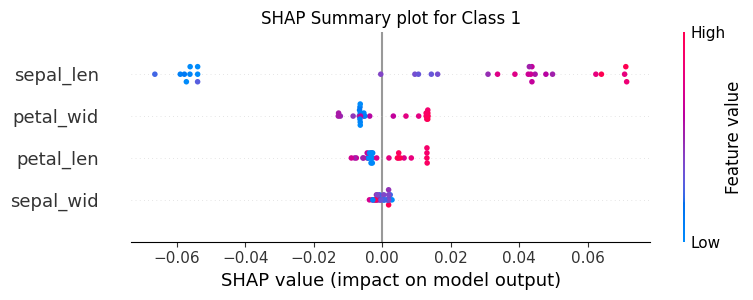

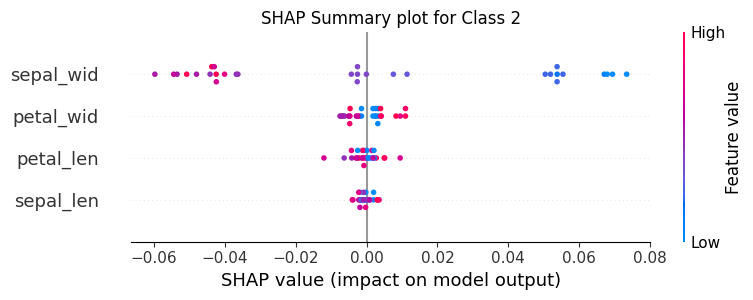

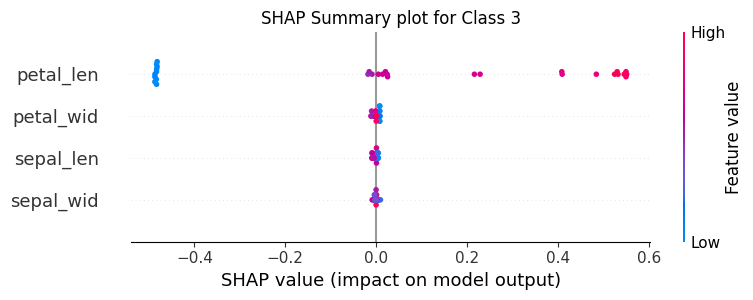

In [ ]:
test_pd1_no_target = test_pd1.iloc[:, :-1]

# SHAP summary plot for each class
num_classes = 3

for class_idx in range(num_classes):
    plt.title(f"SHAP Summary plot for Class {class_idx + 1}")
    shap.summary_plot(shap_values1[class_idx][:, :-1], test_pd1_no_target)


Interpretation for the above plot is as follows:-

* For Target class 1: sepal_len has a very high positive impact on the model output for this class, while petal_wid and petal_len have low positive impact on the model. So a higher value of sepal_len will highly increase the probability of this class.

* For Target class 2: sepal_wid has a very high negative impact on the model output for this class. While the other variables have non significant impact on the model. It means that the higher value sepal_wid occurences will decrease the probability of this class.

* For Target class 3: petal_len has a high positive impact on the model output for this class, while the other predictor variables have almost no impact on the model for this class. This means that petal_len increasing values will increase the probability of this class, while the values of other variables will have no effect.

**Visualizing the Dependence Plot**

<Figure size 640x480 with 0 Axes>

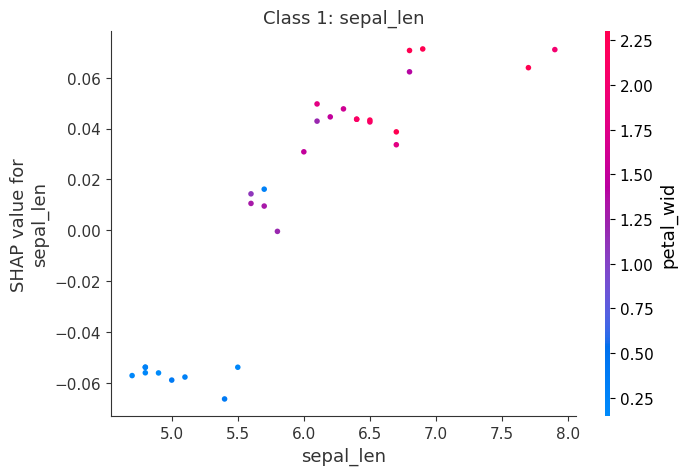

<Figure size 640x480 with 0 Axes>

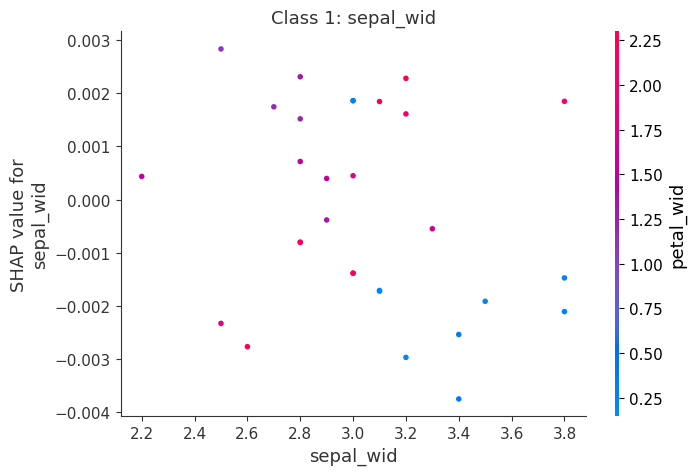

<Figure size 640x480 with 0 Axes>

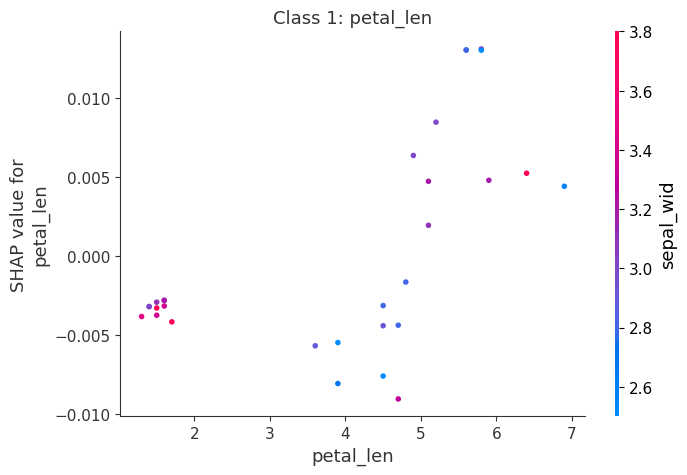

<Figure size 640x480 with 0 Axes>

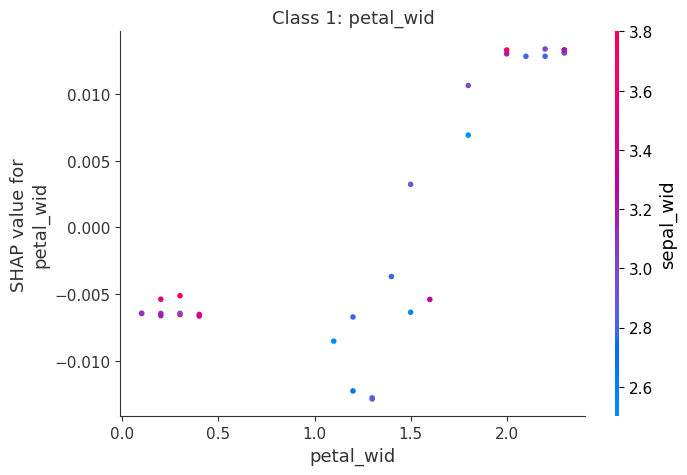

<Figure size 640x480 with 0 Axes>

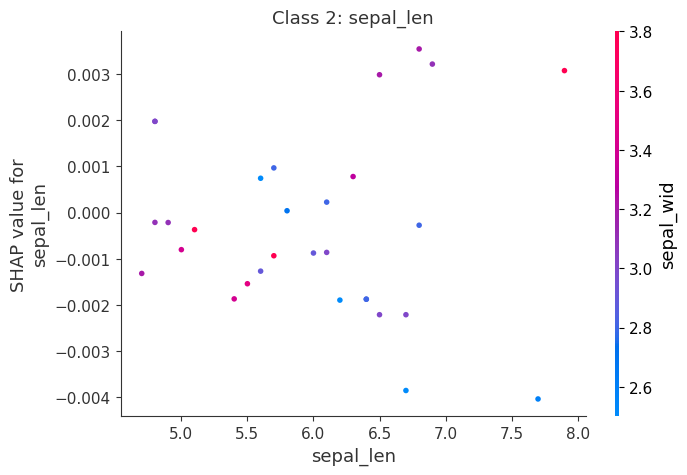

<Figure size 640x480 with 0 Axes>

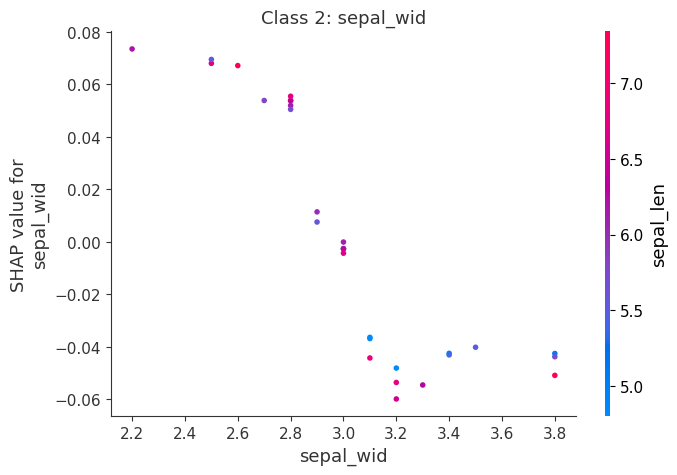

<Figure size 640x480 with 0 Axes>

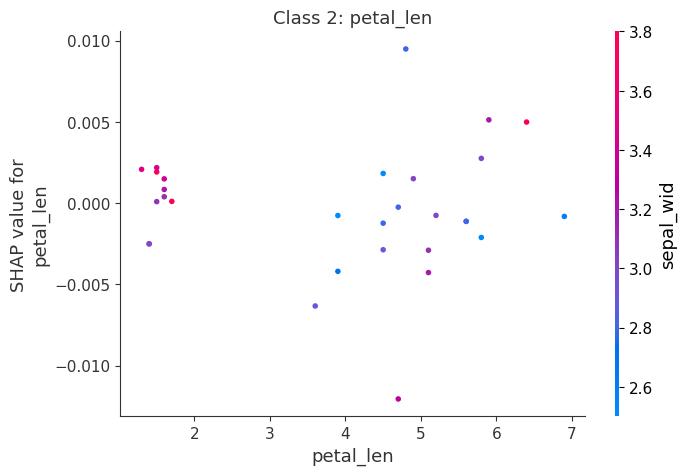

<Figure size 640x480 with 0 Axes>

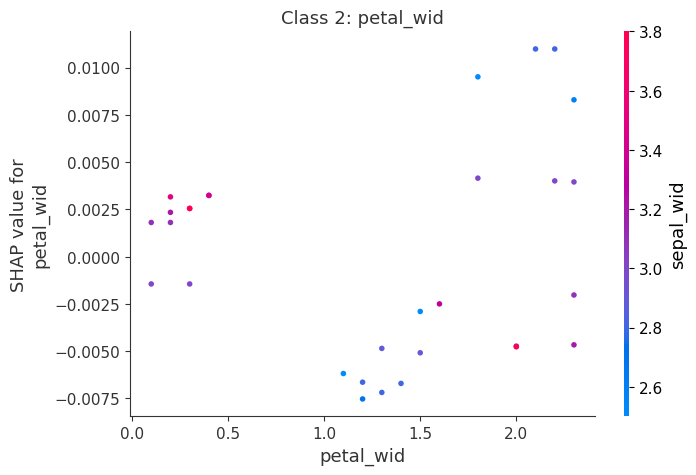

<Figure size 640x480 with 0 Axes>

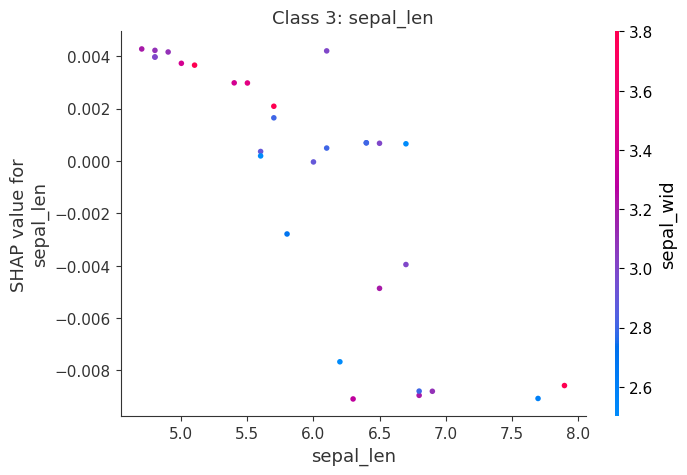

<Figure size 640x480 with 0 Axes>

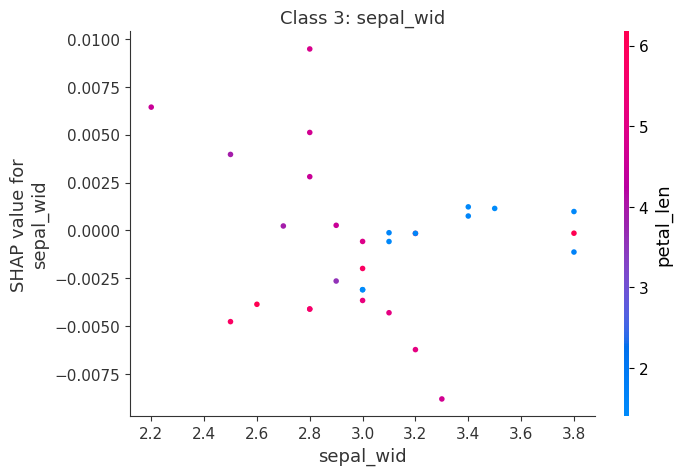

<Figure size 640x480 with 0 Axes>

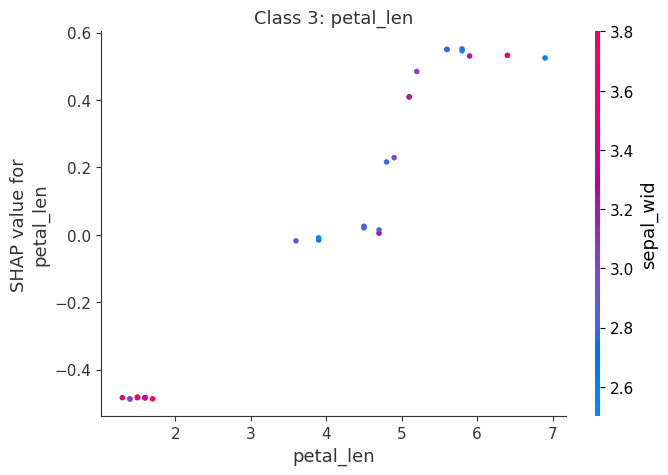

<Figure size 640x480 with 0 Axes>

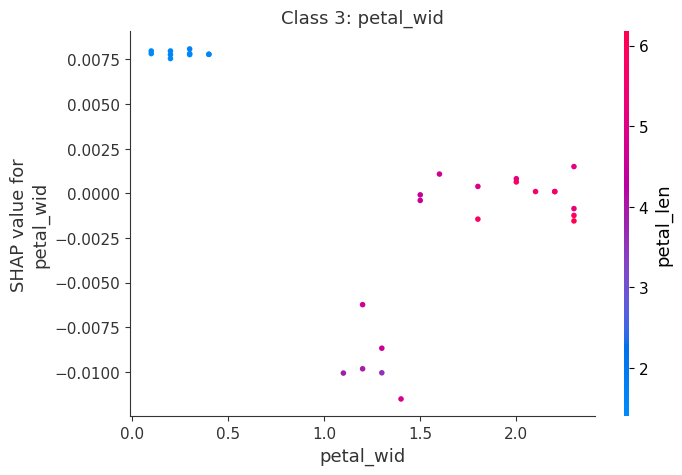

In [ ]:
feature_names = test_pd1.columns[:-1]  # Assuming the last column is the target variable
n_classes = len(shap_values1)
class_labels = [1, 2, 3]

for class_idx, class_label in enumerate(class_labels):
    for feature_name in feature_names:
        plt.figure()
        shap.dependence_plot(feature_name, shap_values1[class_idx], test_pd1, title=f"Class {class_label}: {feature_name}")
        plt.show()

The interpretation of the above plot is as follows:-

* The relationship between the features and the target variable might be non-linear, for all classes, hence, the scattered points all over the plot.

* The features may have significant interactions with other features that influence the model's output, hence the scattered points over the plot.

* The model might be overfitting.

**Visualizing the Force Plot**

Force plot for class 1, instance 1:


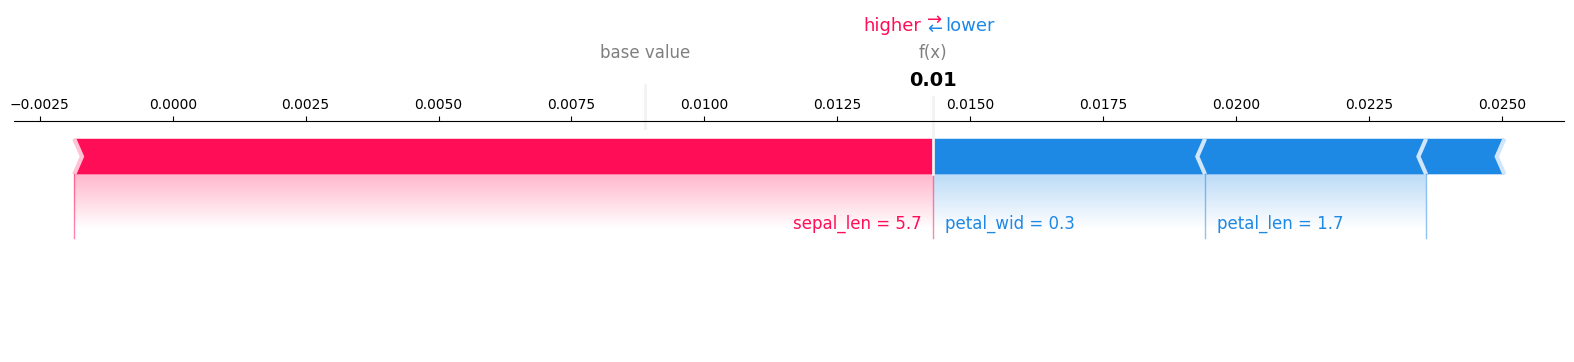

Force plot for class 1, instance 5:


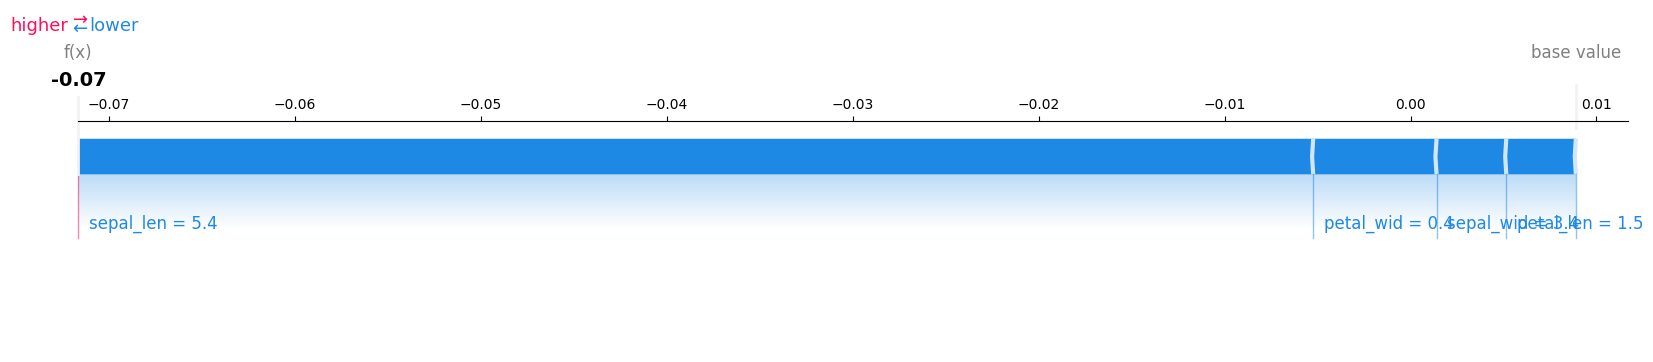

Force plot for class 1, instance 11:


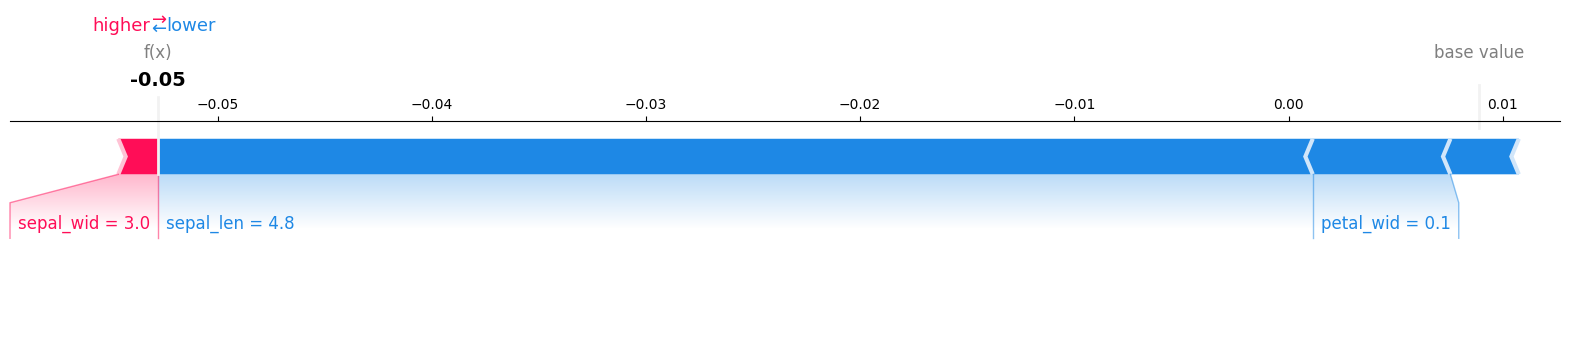

Force plot for class 2, instance 0:


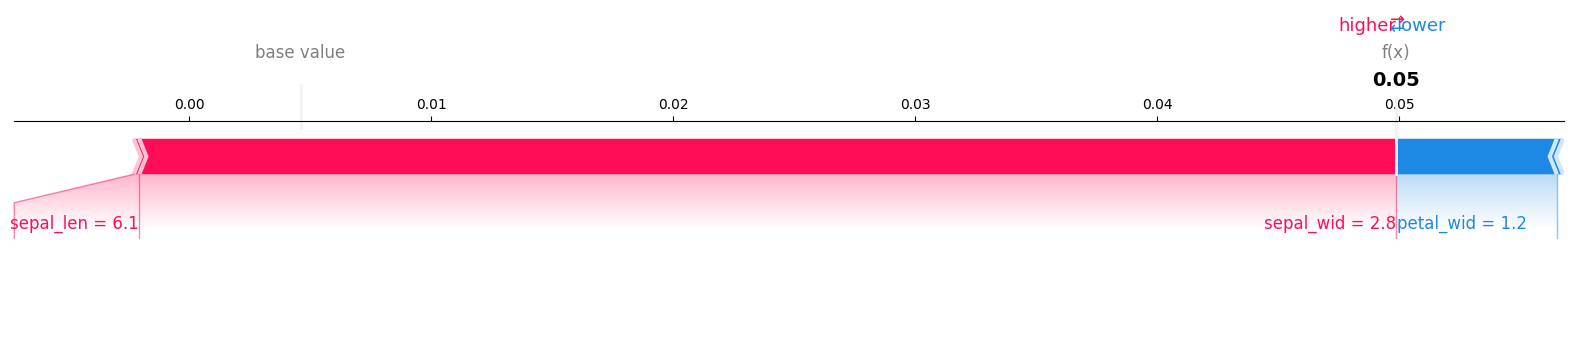

Force plot for class 2, instance 3:


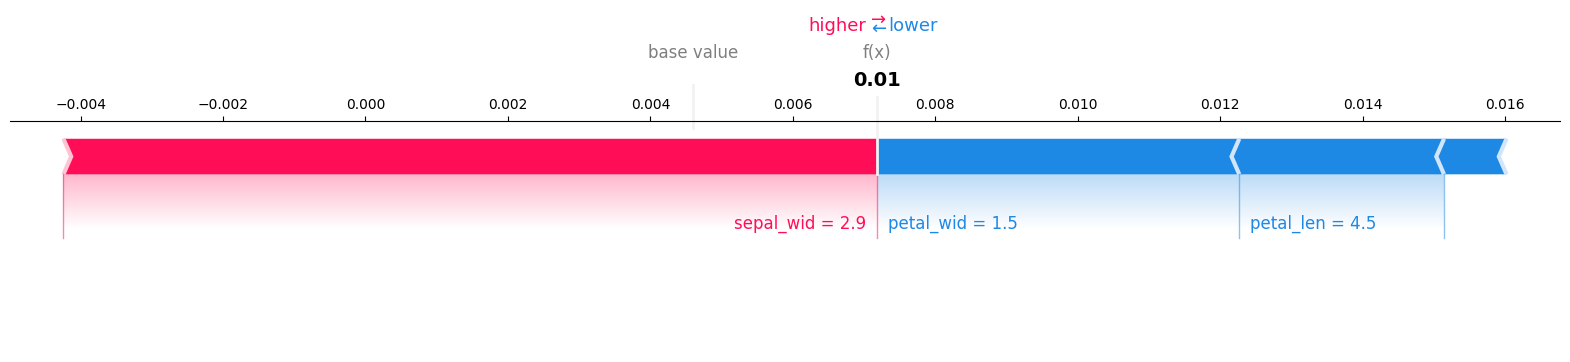

Force plot for class 2, instance 4:


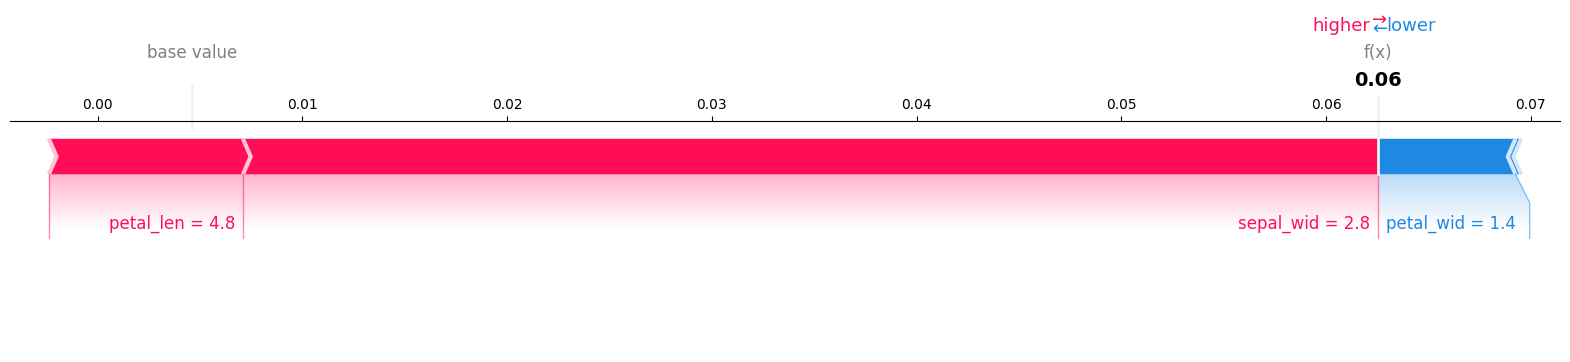

Force plot for class 3, instance 2:


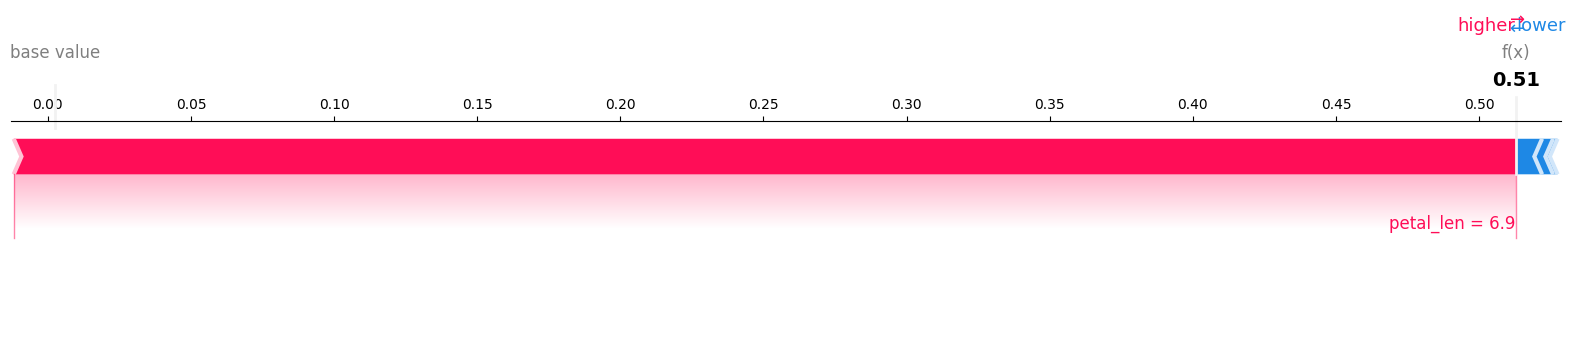

Force plot for class 3, instance 7:


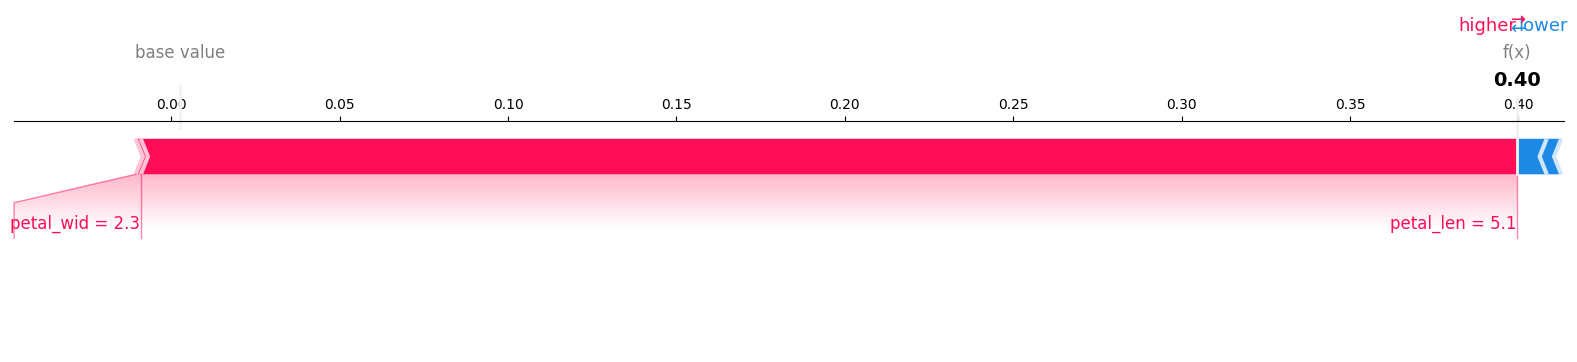

Force plot for class 3, instance 10:


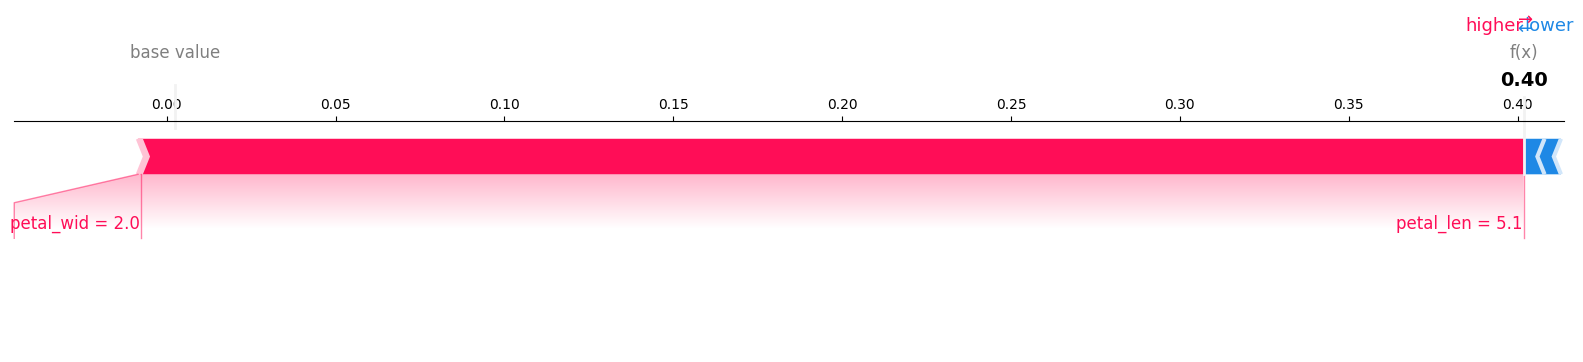

In [ ]:
shap.initjs()

# Find the indices of the first three instances for each class in the test set
instances_per_class = 3
class_indices = {class_label: [] for class_label in class_labels}

for idx, label in enumerate(test_pd1.iloc[:, -1]):  # Assuming the last column is the target variable
    if len(class_indices[label]) < instances_per_class:
        class_indices[label].append(idx)

# Create the force plots
for class_label, indices in class_indices.items():
    for instance_idx in indices:
        print(f"Force plot for class {class_label}, instance {instance_idx}:")
        shap.force_plot(
            explainer1.expected_value[class_label - 1],
            shap_values1[class_label - 1][instance_idx],
            test_pd1.iloc[instance_idx],
            matplotlib=True,
        )
        plt.show()


In the above Force Plot, for each instance in each class, we can see that there are either red or blue bars. The red bars means higher impact of a variable for that instance, while the blue bar means lower impact of a variable for that instance. The length of the bar signifies the level of impact the variable has on that instance, and we can also see the arrows, which if are left turned, represent negative impact and if right turned, represent positive impact.

So overall, we can see how an instance is being affected and in what way, and by which variable by looking at the force plots.

# Implementing AutoML and Visualizing SHAP Plots for the Mobile Price Dataset

**Defining the target and the predictor variables**

In [ ]:
target2 = "price_range"
predictors2 = df_mobile.columns[:-1]  # Since the target column is the last one

**Converting to pandas Dataframe**

In [ ]:
df_mobile_pd = df_mobile.as_data_frame()

**Splitting Data into Training and Testing Sets**

In [ ]:
train_pd2, test_pd2 = train_test_split(df_mobile_pd, test_size=0.2, random_state=42)

**Converting the training and test sets back to h2o dataframe**

In [ ]:
train2 = h2o.H2OFrame(train_pd2)
test2 = h2o.H2OFrame(test_pd2)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


**Training AutoML**

In [ ]:
aml2 = H2OAutoML(max_models=10, seed=42)
aml2.train(x=predictors2, y=target2, training_frame=train2)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_2_20230421_153027


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  9/10
# GBM base models (used / total)      3/4
# XGBoost base models (used / total)  3/3
# DRF base models (used / total)      2/2
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.010791799842616287
RMSE: 0.10388358793676837
MAE: 0.08348216969780486
RMSLE: 0.05781112645227334
Mean Residual Deviance: 0.010791799842616287
R^2: 0.991216915580394
Null degrees of freedom: 1599
Residual degrees of freedom: 1590
Null deviance: 1965.9243750000214
Residual deviance: 17.26687974818606
AIC: -2683.7466250700927

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.07246035221572612
RMSE: 0.26918460620125756
MAE: 0.20155247637401538
RMSLE: 0.13436369256651437
Mean Residual Deviance: 0.07246035221572612
R^2: 0.9410269463975888
Null degrees of freedom: 1599
Residual degrees of freedom: 1590
Null deviance: 1969.355409966907
Residual deviance: 115.93656354516179
AIC: 363.0581339393751

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.202774   0.00788315  0.20142       0.194893      0.208362      0.213164      0.196032
mean_residual_deviance  0.0726036  0.00588351  0.0727968     0.0647794     0.0778645     0.0786219     0.0689552
mse                     0.0726036  0.00588351  0.0727968     0.0647794     0.0778645     0.0786219     0.0689552
null_deviance           393.871    14.7891     372.069       390.208       394.373       412.448       400.257
r2                      0.94072    0.00457304  0.938877      0.946698      0.935007      0.939201      0.943815
residual_deviance       23.2321    1.93119     22.6398       20.7942       25.4617       24.9231       22.3415
rmse                    0.269272   0.0109746   0.269809      0.254518      0.279042      0.280396      0.262593
rmsle                   0.134757   0.0073581   0.137463      0.132563      0.14524       0.133389      0.125131

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

**Printing the Leaderboard and Selecting the third best model**

In [ ]:
# Get the leaderboard
leaderboard2 = aml2.leaderboard

# Print the leaderboard
print(leaderboard2)

# Get the second-best model
third_best_model = h2o.get_model(leaderboard2[2, "model_id"])  # Access the third row (index 2) and get the model_id


model_id                                                     rmse        mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_2_20230421_153027     0.269185  0.0724604  0.201552  0.134364                 0.0724604
StackedEnsemble_BestOfFamily_1_AutoML_2_20230421_153027  0.271166  0.0735311  0.205203  0.135876                 0.0735311
GBM_4_AutoML_2_20230421_153027                           0.278425  0.0775202  0.19872   0.138104                 0.0775202
GBM_3_AutoML_2_20230421_153027                           0.282273  0.0796781  0.211638  0.142489                 0.0796781
GBM_2_AutoML_2_20230421_153027                           0.284341  0.0808495  0.212563  0.143417                 0.0808495
GBM_1_AutoML_2_20230421_153027                           0.29287   0.0857731  0.241015  0.153403                 0.0857731
XRT_1_AutoML_2_20230421_153027                           0.316146  0.0999486  0.248312  0.163465                 0.0999486
XGBoost_1_AutoML

We are selecting the third based model here because it is the first model in the leaderboard which fully supports SHAP Analysis. The top 2 do not.

In [ ]:
print(third_best_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_4_AutoML_2_20230421_153027


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    57                 57                          65548                  8            10           9.96491       54            100           86.8597

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.006539343841457037
RMSE: 0.08086620951582334
MAE: 0.05750247523483267
RMSLE: 0.04199535822134446
Mean Residual Deviance: 0.006539343841457037

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.0775202070564176
RMSE: 0.27842450872079777
MAE: 0.19871971827543802
RMSLE: 0.13810399782871446
Mean Residual Deviance: 0.0

**Define the Function to calculate contribution and SHAP values**

In [ ]:
# Define the model function for H2O
def h2o_model_predict_contributions(data_as_array):
    data_as_frame = h2o.H2OFrame(data_as_array)
    data_as_frame.columns = train2.columns
    contributions2 = third_best_model.predict_contributions(data_as_frame).as_data_frame()
    return contributions2.values[:, :-1]

In [ ]:
# Summarize the background data using 200 k-means clusters
background_data = shap.kmeans(train2.as_data_frame(), 200)

# Randomly select a subset of test data
sample_indices = np.random.choice(len(test_pd2), 200, replace=False)
test_pd2_sample = test_pd2.iloc[sample_indices]

explainer2 = shap.KernelExplainer(h2o_model_predict_contributions, background_data)
shap_values2 = explainer2.shap_values(test_pd2_sample, nsamples=100)  # You can adjust the number of samples (nsamples) as needed


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
contributions progress: |

████████████████████████████████████████████████████████| (done) 100%


  0%|          | 0/200 [00:00<?, ?it/s]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
contributions progress: |████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
contributions progress: |████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
contributions progress: |████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
contributions progress: |████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
contributions progress: |████████████████████████████████████████████████████████| (done) 100%
Parse progress: |█████████████████████████████████

We used only 200 samples and k-means cluster because ours is a big dataset and hence it is very computationally expensive, and takes very much time. So using 200 samples and k-means cluster helps it and takes a little less time to complete.

**Visualizing the SHAP Summary Plot**

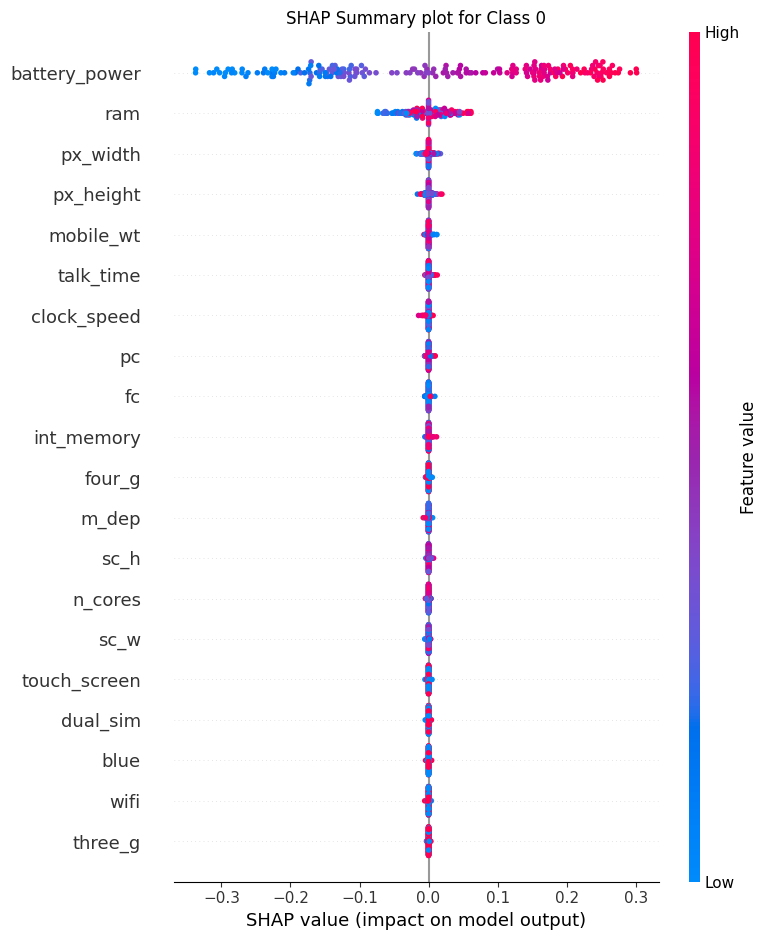

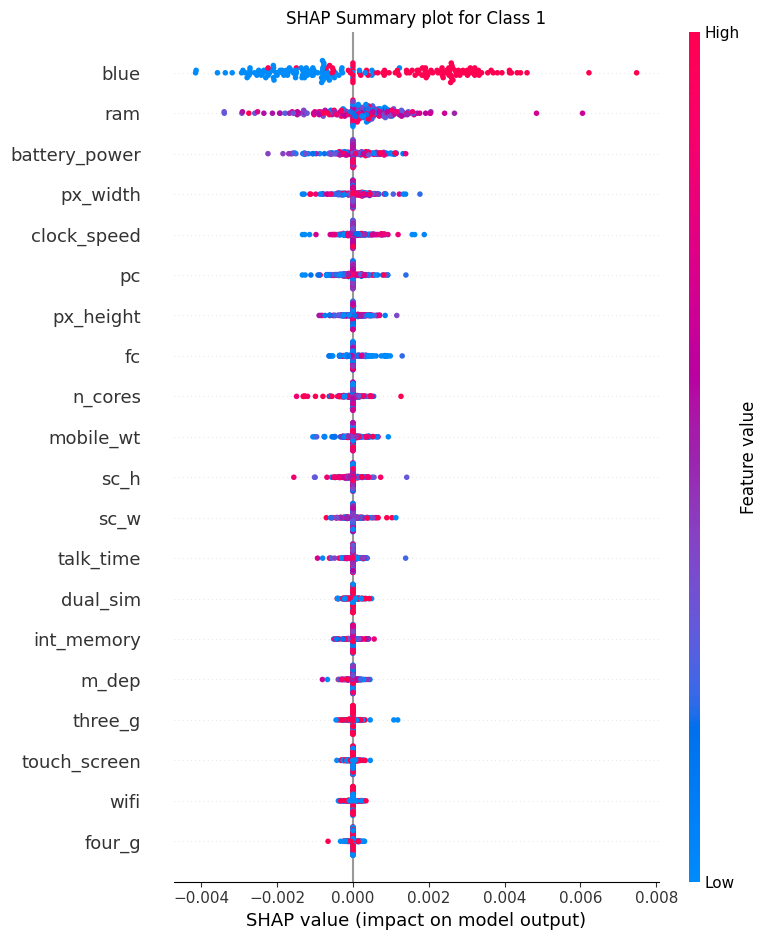

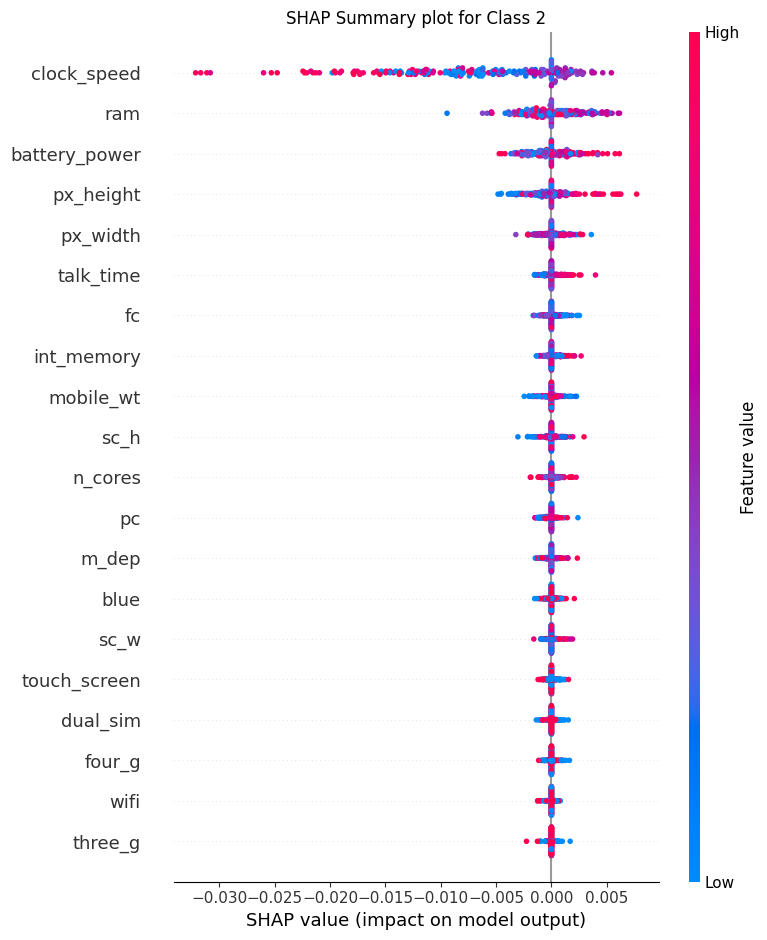

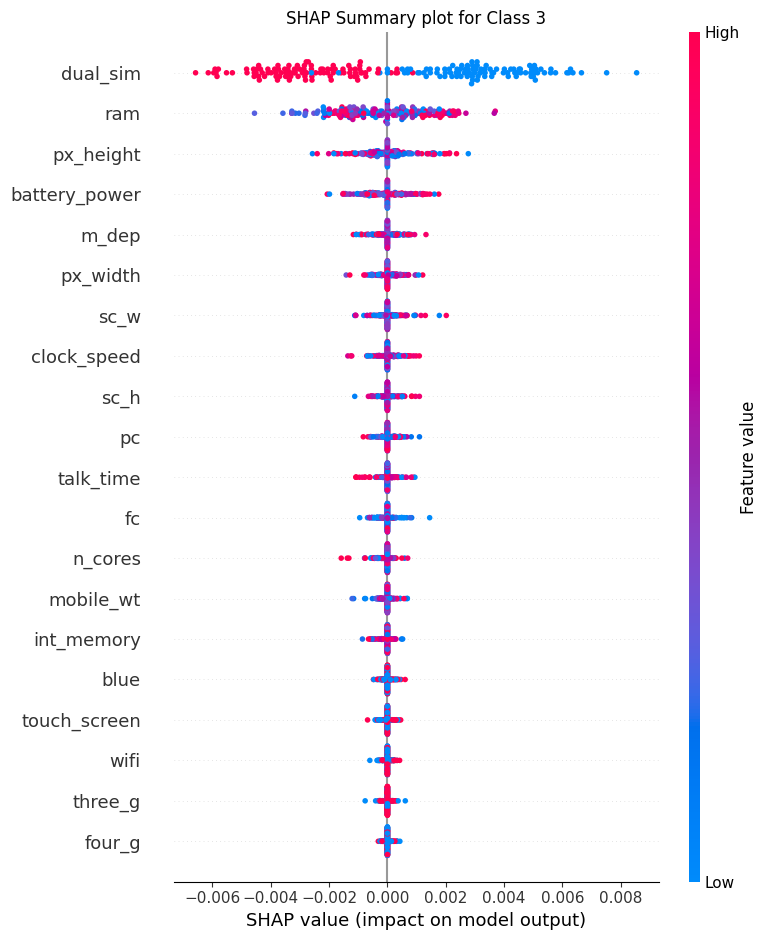

In [ ]:
test_pd2_sample_no_target = test_pd2_sample.iloc[:, :-1]

# SHAP summary plot for each class
num_classes = 4

for class_idx in range(num_classes):
    plt.title(f"SHAP Summary plot for Class {class_idx}")
    shap.summary_plot(shap_values2[class_idx][:, :-1], test_pd2_sample_no_target)

The interpretation of above plot is as follows:-

* For Target class 0: As we can see, battery_power has a high positie impact on the model for class 0, while ram has a little positive impact on the model. Which means that a higher battery_power value will mean a high probability of class 0. The other variables do not have significant impact on the model.

* For Target class 1: blue has the most significant positive impact on the model, which means that it having higher value will increase the chances of getting this class.ram has a mixed impact, so not much can be said about it. Same goes for the other variables having little impact on the model but not specifically positive or negative. n_cores has a little negative impact on the model.

* For Target class 2: clock_speed has a significant negative impact on the model for this class. While ram has a little unclear impact on the model, variables such as battery_power, px_height, talk_time and int_memory have little positive impact on the model.

* For Target class 3: dual_sim has a high negative impact on this model, while the variables like ram, px_height have positive impact on the model, which means a higher likelihood for this class with the increased values of these variables.

**Visualizing the Dependence Plot**

Class 0: ram


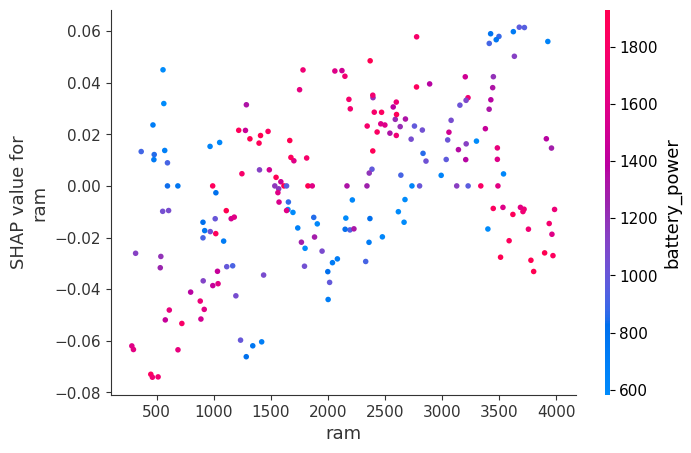

Class 0: battery_power


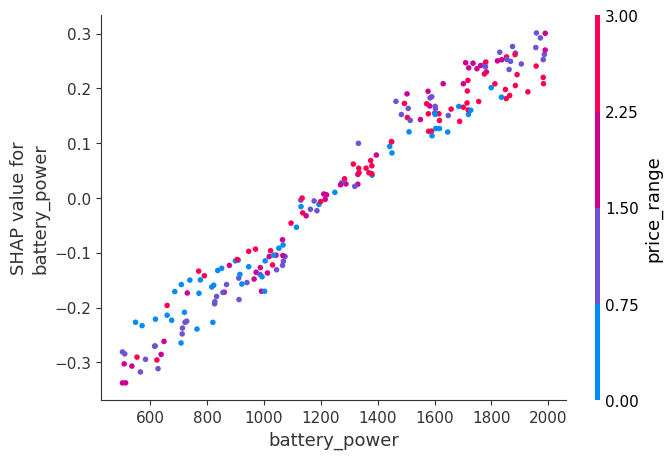

Class 0: px_height


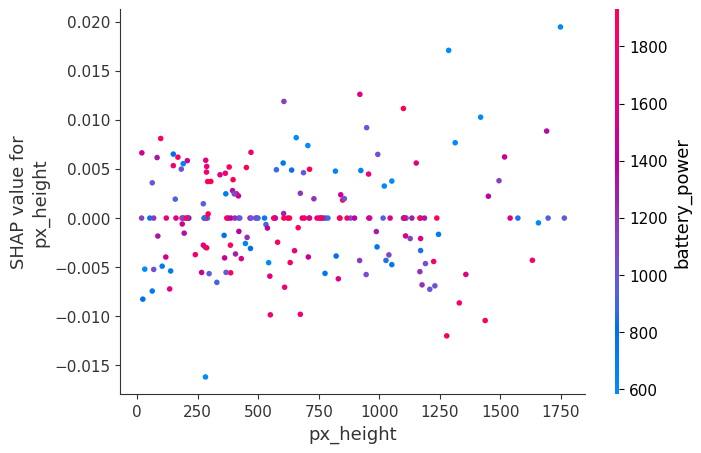

Class 0: px_width


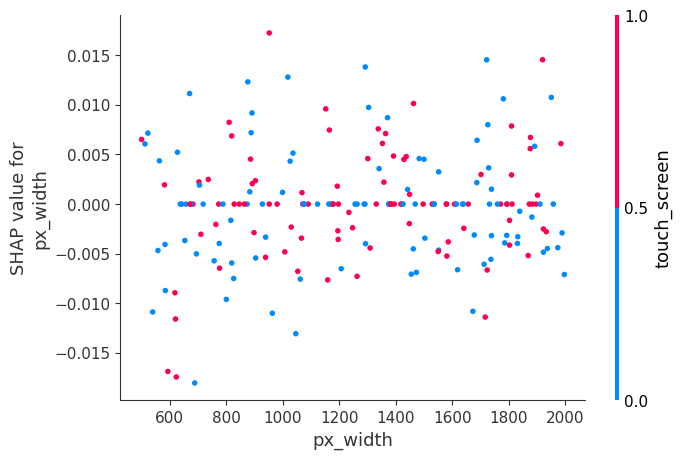

Class 0: mobile_wt


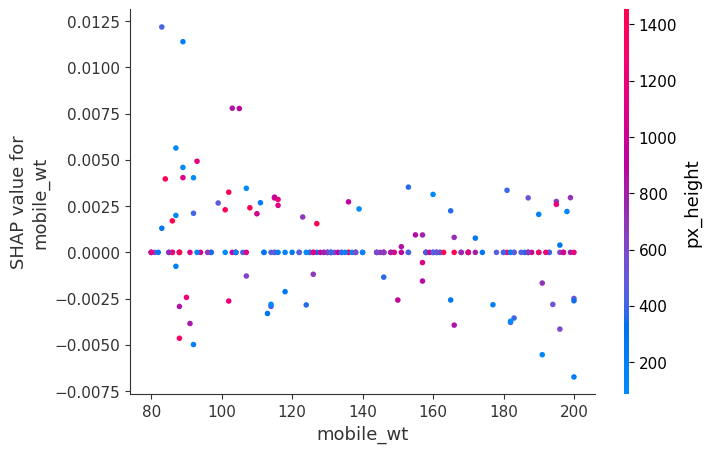

Class 1: ram


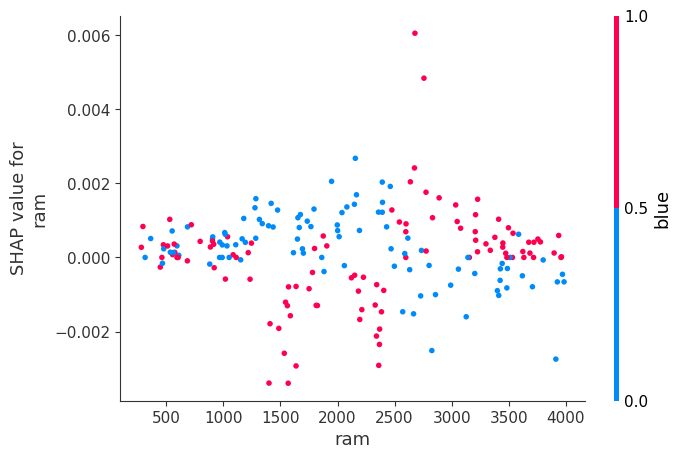

Class 1: battery_power


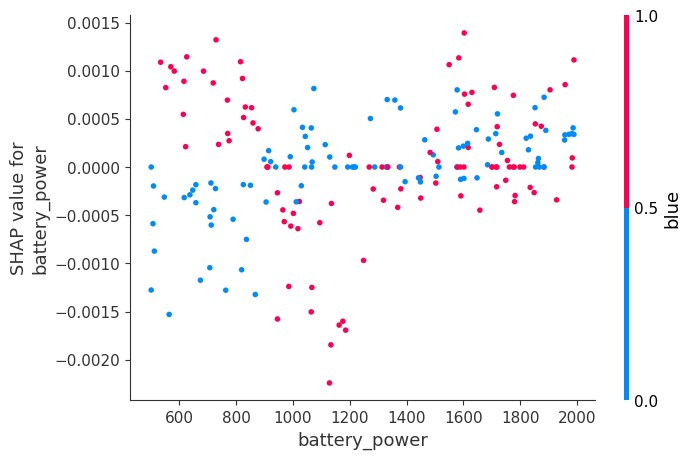

Class 1: px_height


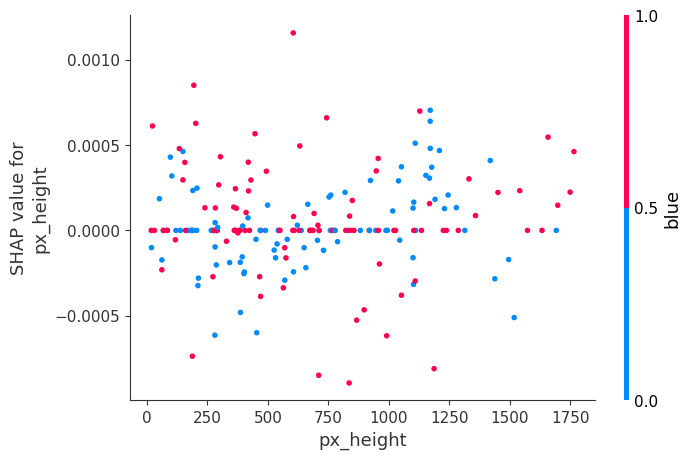

Class 1: px_width


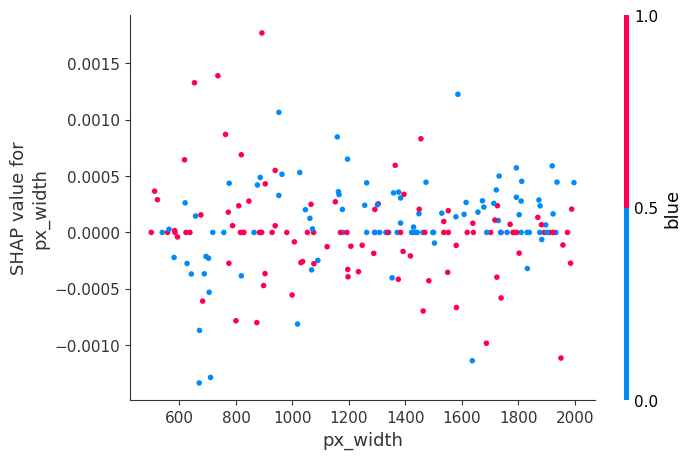

Class 1: mobile_wt


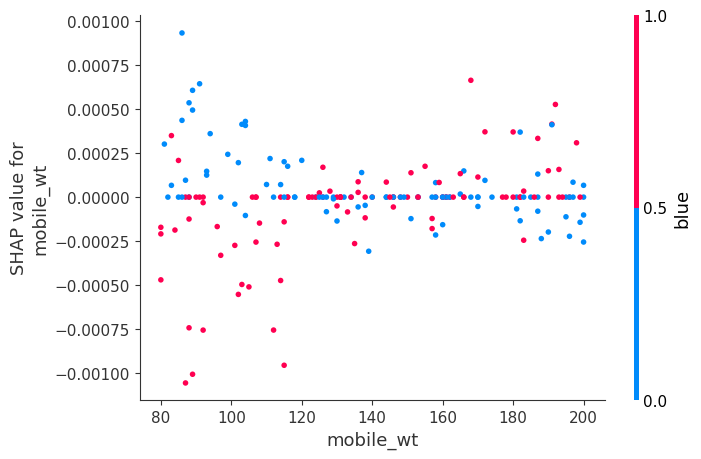

Class 2: ram


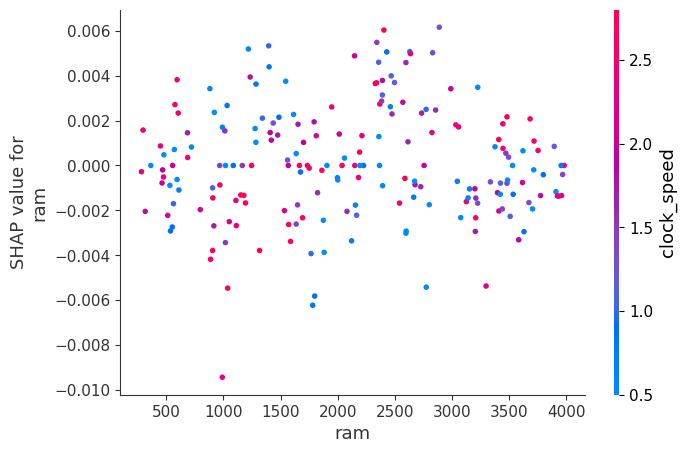

Class 2: battery_power


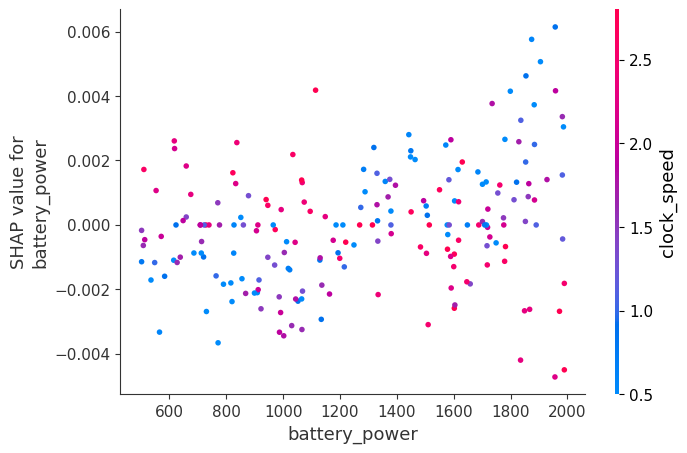

Class 2: px_height


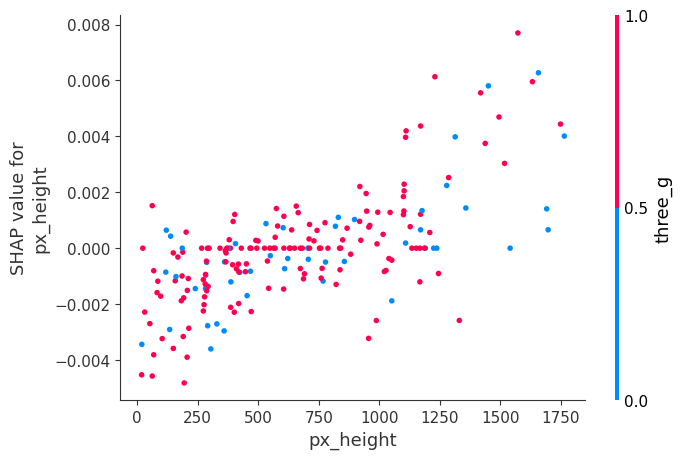

Class 2: px_width


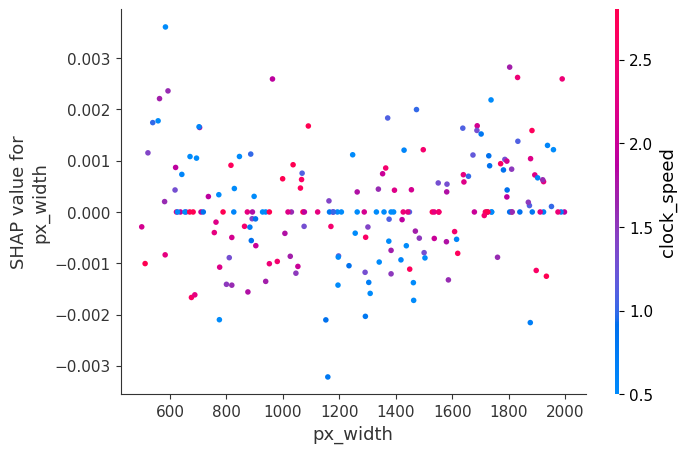

Class 2: mobile_wt


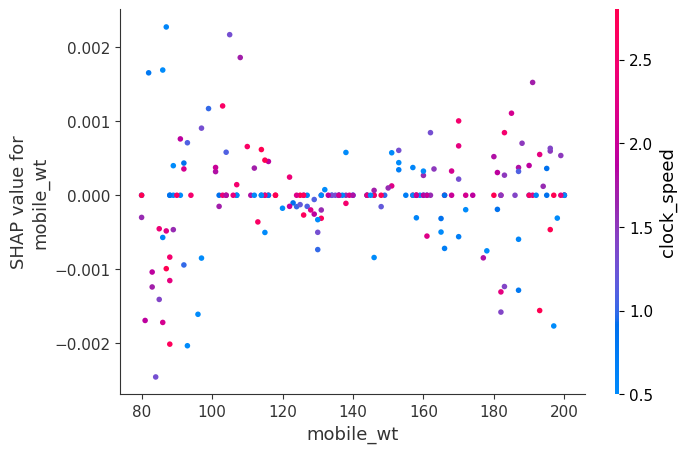

Class 3: ram


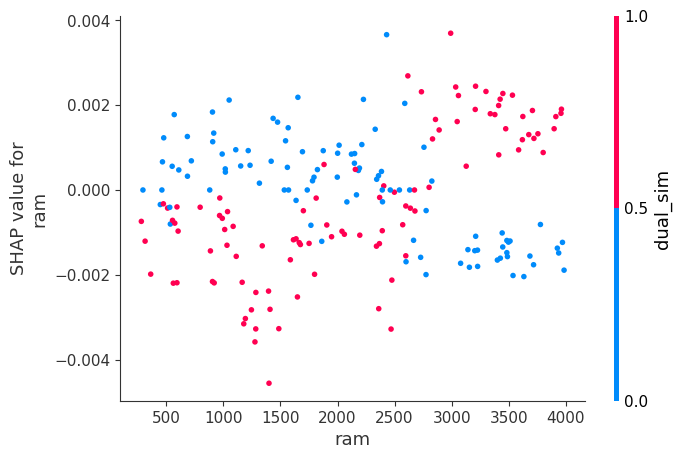

Class 3: battery_power


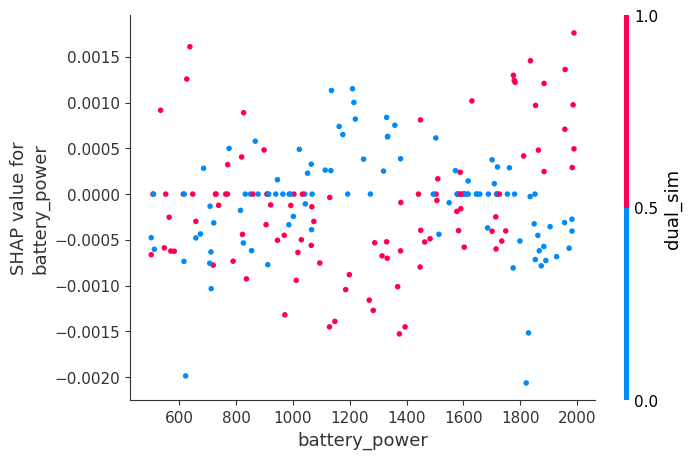

Class 3: px_height


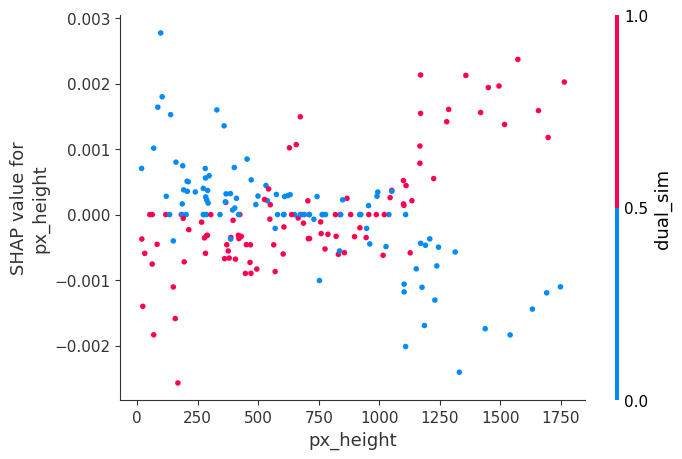

Class 3: px_width


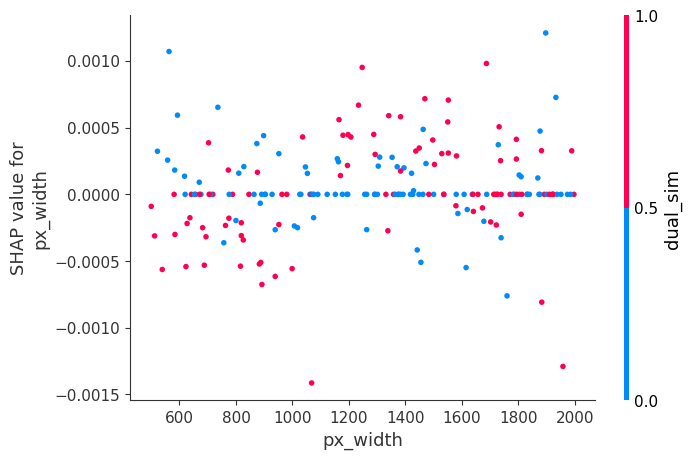

Class 3: mobile_wt


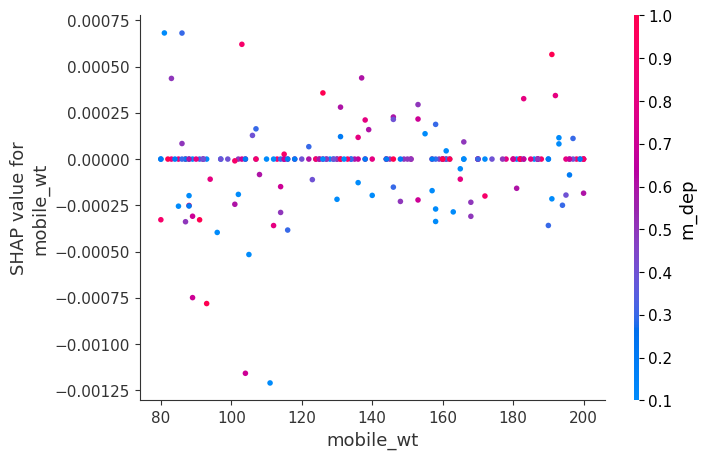

In [ ]:
# SHAP dependence plot for each specific feature and class
specific_features = ['ram', 'battery_power', 'px_height','px_width','mobile_wt']  # Replace with your specific feature names
num_classes = 4

for class_idx in range(num_classes):
    for feature_name in specific_features:
        print(f"Class {class_idx}: {feature_name}")
        shap.dependence_plot(feature_name, shap_values2[class_idx], test_pd2_sample)

The interpretation of the above plot is as follows:-

* The relationship between the features and the target variable might be non-linear, for all classes, hence, the scattered points all over the plot.

* The features may have significant interactions with other features that influence the model's output, hence the scattered points over the plot.

* For some features, a somewhat flat curve implies that those might have low impact on the model output.

* There is also a presence of positive relationship or proportional relationship among some features, meaning that the increase in their values might leave a positive impact on the model output class.

* The model might be overfitting.

**Visualizing the Force Plot**

Class 0, Instance 2


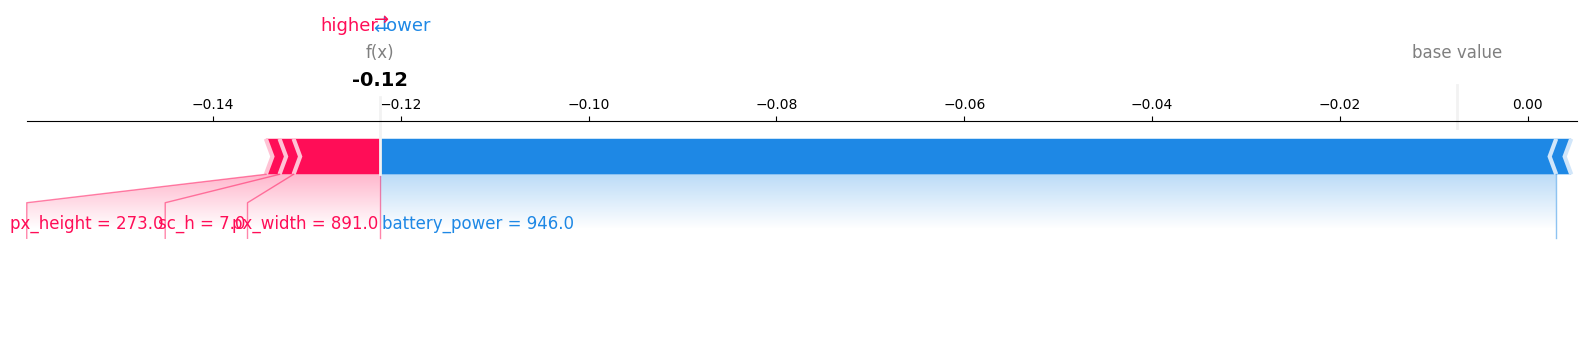

Class 0, Instance 11


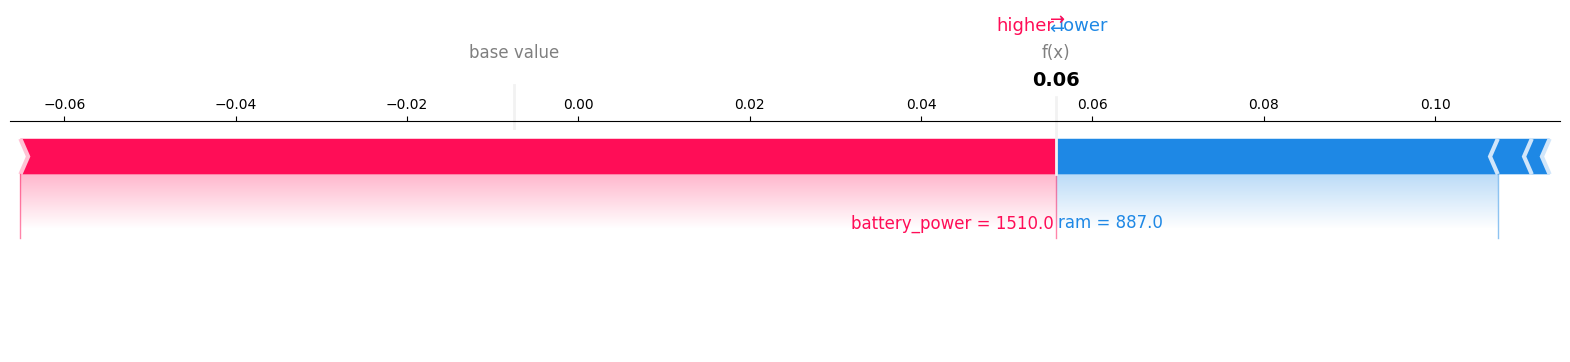

Class 0, Instance 15


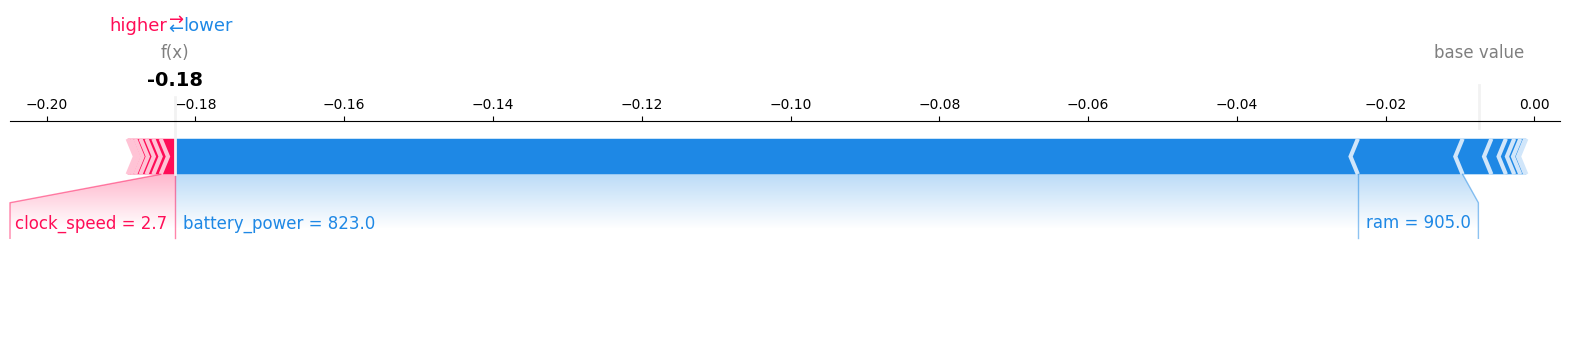

Class 1, Instance 7


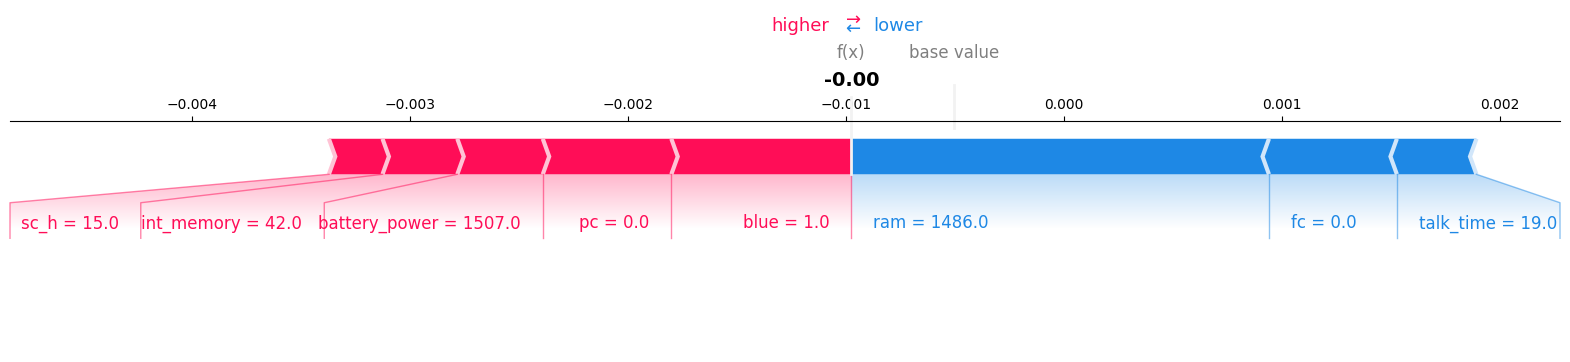

Class 1, Instance 10


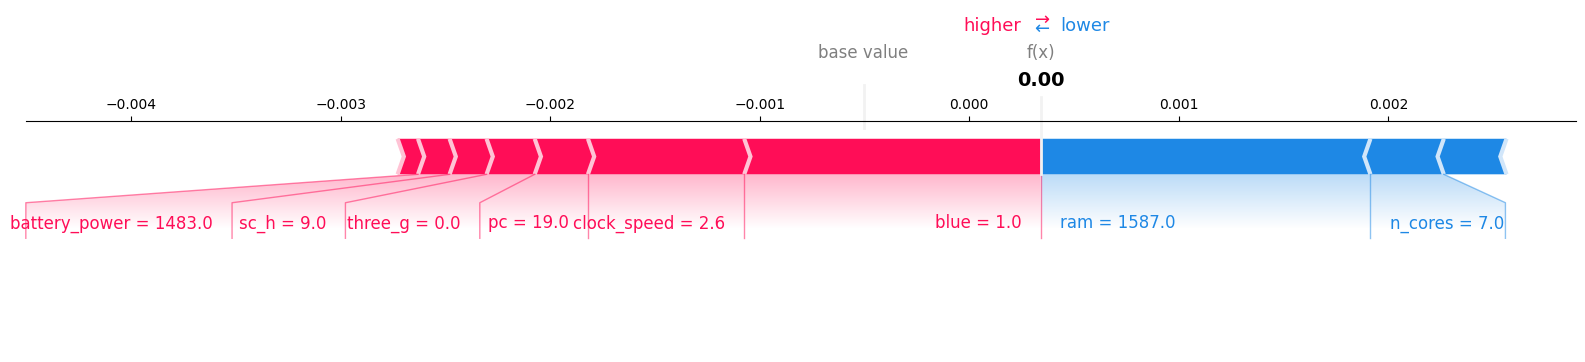

Class 1, Instance 12


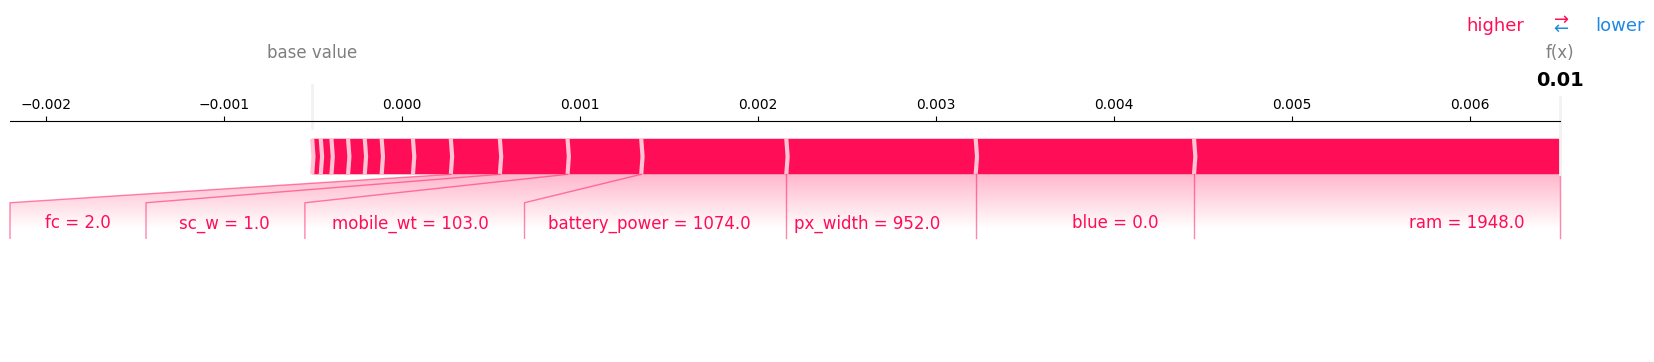

Class 2, Instance 1


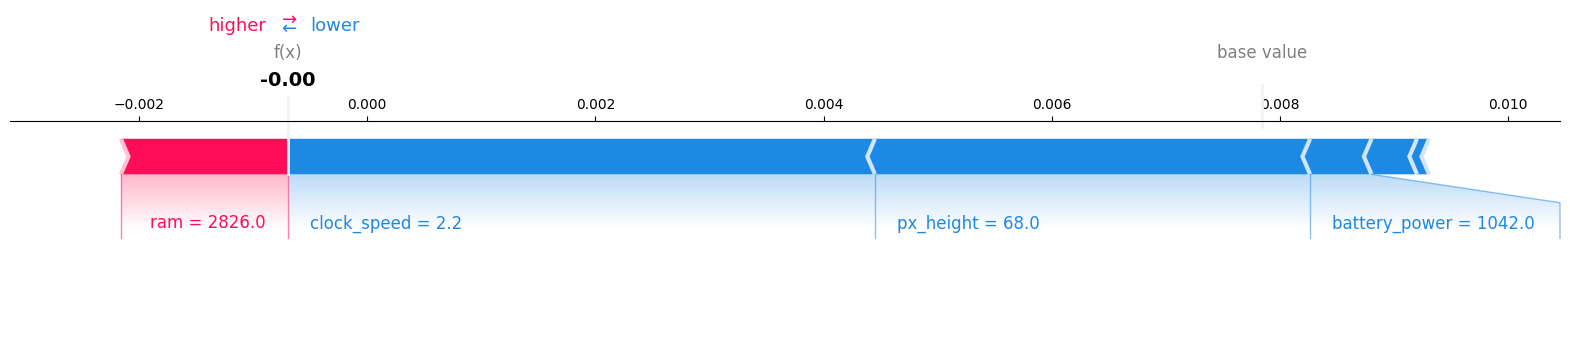

Class 2, Instance 5


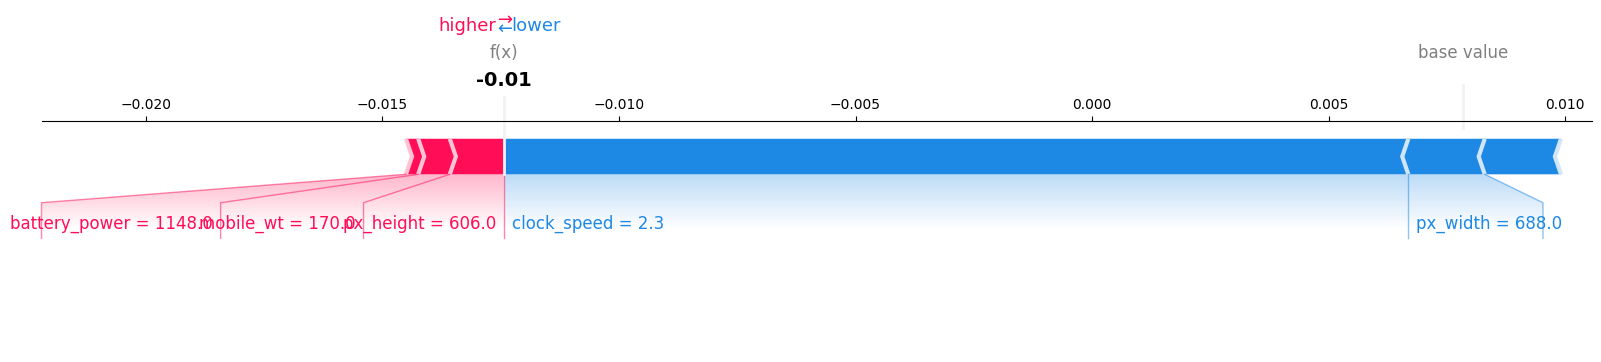

Class 2, Instance 6


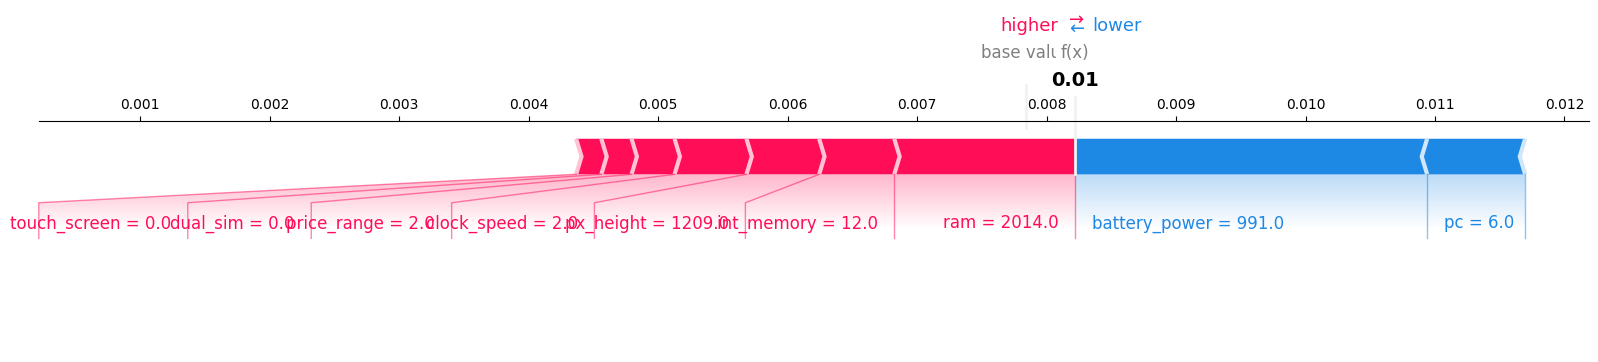

Class 3, Instance 0


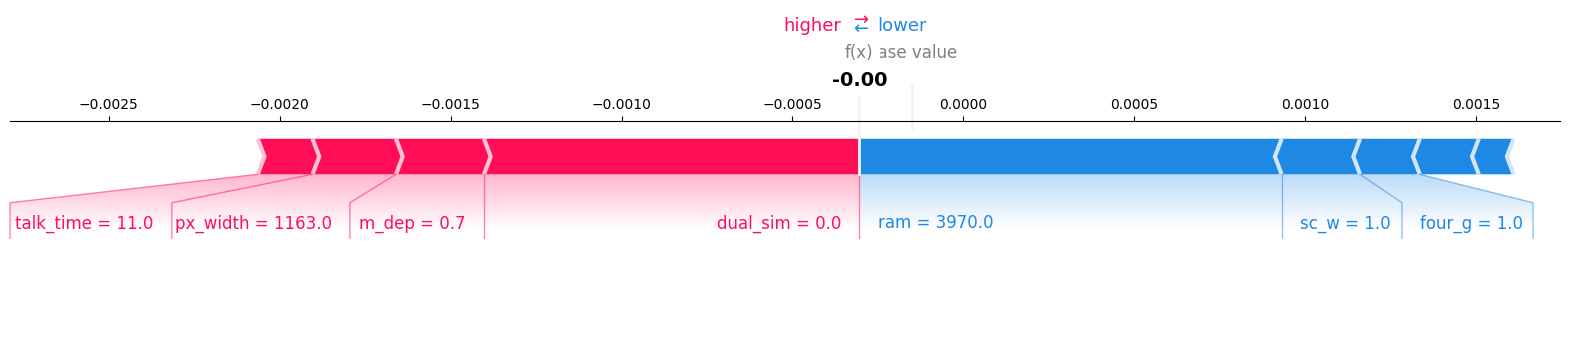

Class 3, Instance 3


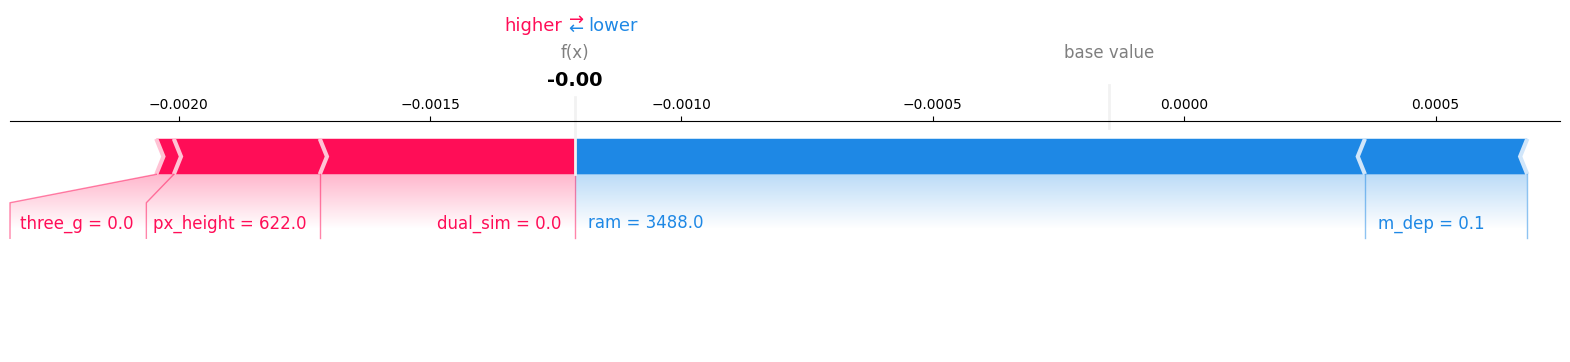

Class 3, Instance 4


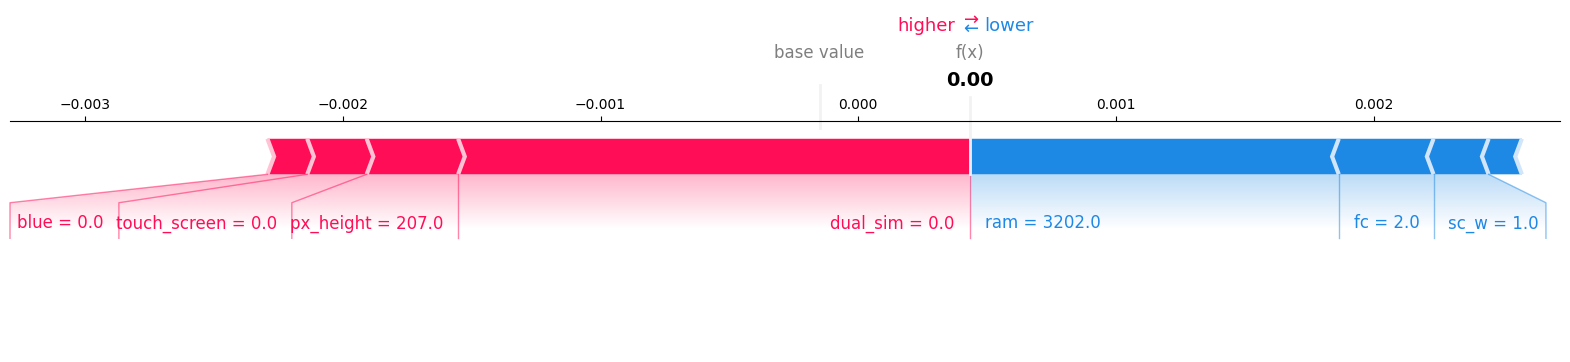

In [ ]:
shap.initjs()

# SHAP force plot for 3 instances of each class
instance_indices = {class_idx: [] for class_idx in range(num_classes)}

# Find the indices of the first three instances for each class in the test set
for idx, label in enumerate(test_pd2_sample.iloc[:, -1]):  # Assuming the last column is the target variable
    if len(instance_indices[label]) < 3:
        instance_indices[label].append(idx)

for class_idx in range(num_classes):
    for instance_idx in instance_indices[class_idx]:
        print(f"Class {class_idx}, Instance {instance_idx}")
        shap.force_plot(
            explainer2.expected_value[class_idx],
            shap_values2[class_idx][instance_idx],
            test_pd2_sample.iloc[instance_idx],
            matplotlib=True,
        )
        plt.show()


In the above Force Plot, for each instance in each class, we can see that there are either red or blue bars. The red bars means higher impact of a variable for that instance, while the blue bar means lower impact of a variable for that instance. The length of the bar signifies the level of impact the variable has on that instance, and we can also see the arrows, which if are left turned, represent negative impact and if right turned, represent positive impact.

So overall, we can see how an instance is being affected and in what way, and by which variable by looking at the force plots.

# Learning Outcomes

* Learnt to use AutoML and how to extract the appropriate models from the leaderboard.

* Visualized the SHAP plots for the extracted AutoML model for both datasets.

* Interpreted the visualizations.

# References

* https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a

* https://christophm.github.io/interpretable-ml-book/shap.html#shap-dependence-plot

* https://github.com/dataman-git/codes_for_articles/blob/master/Explain%20any%20models%20with%20the%20SHAP%20values%20-%20the%20KernelExplainer%20for%20article.ipynb